In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [68]:
df = pd.read_csv('Xeek_Well_15-9-15.csv')

lith_percentage = round(df['LITH'].value_counts()/len(df) * 100, 2)
lith_data_df = lith_percentage.to_frame().reset_index()
lith_data_df.columns = ['LITH', 'PERCENTAGE']

lith_data_df

lith_data_df.to_dict()

{'LITH': {0: 'Shale',
  1: 'Sandstone',
  2: 'Sandstone/Shale',
  3: 'Chalk',
  4: 'Limestone',
  5: 'Marl',
  6: 'Tuff'},
 'PERCENTAGE': {0: 61.36,
  1: 15.36,
  2: 9.76,
  3: 5.47,
  4: 5.11,
  5: 2.17,
  6: 0.76}}

In [69]:
lith_dict = {'LITH': ['Shale', 'Sandstone', 'Sandstone/Shale', 'Chalk', 'Limestone',
                      'Marl', 'Tuff'],
             'PERCENTAGE': [61.36, 15.36, 9.76, 5.47, 5.11, 2.17, 0.77]}

lith_data_df = pd.DataFrame.from_dict(lith_dict)

In [70]:
lith_data_df

,LITH,PERCENTAGE
0,Shale,61.36
1,Sandstone,15.36
2,Sandstone/Shale,9.76
3,Chalk,5.47
4,Limestone,5.11
5,Marl,2.17
6,Tuff,0.77


In [71]:
lith_data_df['PERCENTAGE'].sum()

100.0

In [72]:
lith = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Chalk', 'Limestone', 'Marl', 'Tuff']

percentage = [61.36, 15.36, 9.76, 5.47, 5.11, 2.17, 0.76]

colours = ['#8dd3c7', '#deb887', '#fb8072', '#bebada', '#80b1d3', '#fdb462', '#b3de69']

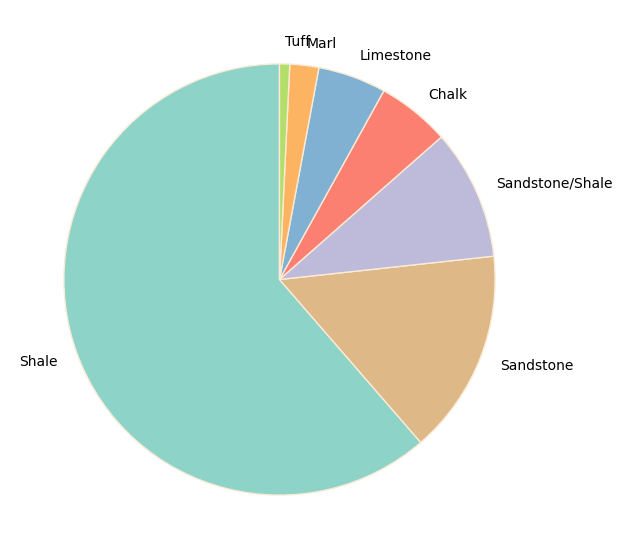

In [157]:
lith_labels = lith_data_df['LITH'].unique()

plt.figure(figsize=(7,7))
plt.pie(lith_data_df['PERCENTAGE'],
        labels=lith_labels,
        colors=colours,
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'antiquewhite'})
plt.show()

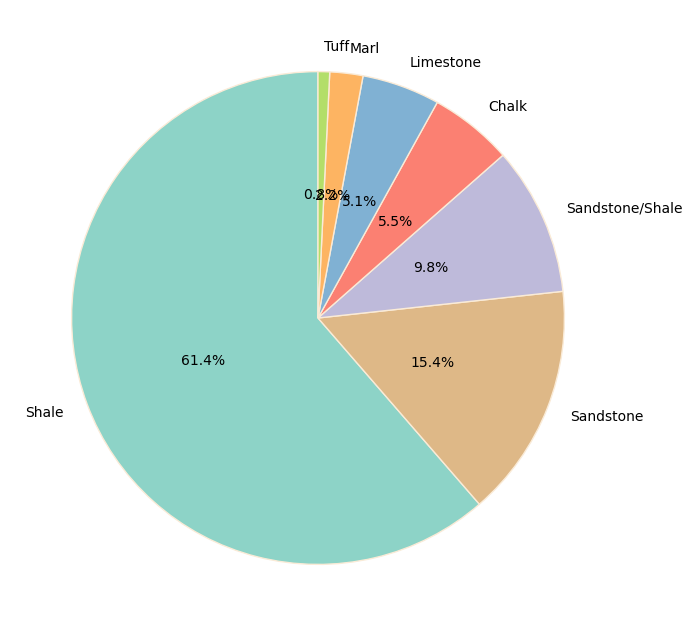

In [156]:
import math

plt.figure(figsize=(8, 8))

pie_chart = plt.pie(lith_data_df['PERCENTAGE'],
                    labels = lith_labels,
                    colors=colours,
                    startangle=90,
                    autopct='%0.1f%%',
                    wedgeprops={'linewidth': 1, 'edgecolor': 'antiquewhite'},
                    pctdistance=0.5)

plt.show()

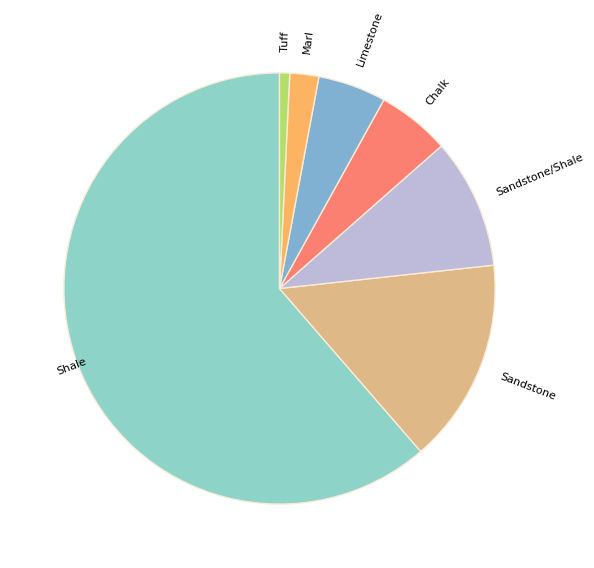

In [152]:
import math
plt.figure(figsize=(7, 7))

pie_chart = plt.pie(lith_data_df['PERCENTAGE'],
                    colors=colours,
                    startangle=90,
                    wedgeprops={'linewidth': 1, 'edgecolor': 'antiquewhite'})
                    
for label, pie_slice in zip(lith_labels, pie_chart[1]):
    x, y = pie_slice.get_position()
    angle = int(math.degrees(math.atan2(y,x)))
    horiz_align = 'left'
    
    if x < 0:
        angle-= 180
        horiz_align = 'left'
        
    plt.annotate(label, xy=(x,y), rotation=angle, ha=horiz_align, va='center', rotation_mode='anchor', size=8 )

plt.show()

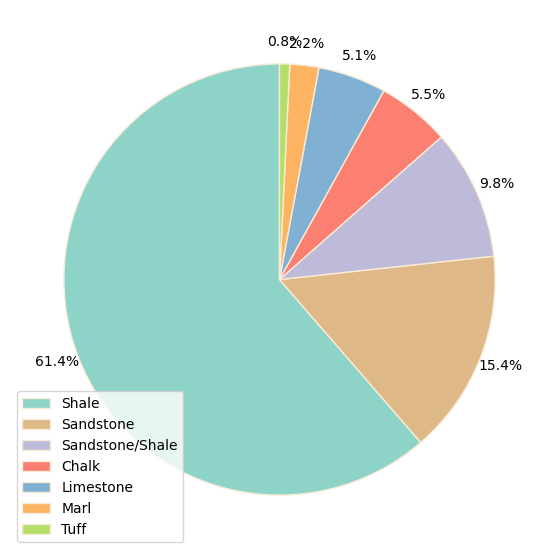

In [151]:
plt.figure(figsize=(7,7))
plt.pie(lith_data_df['PERCENTAGE'],
                    colors=colours,
                    startangle=90,
                    autopct= '%0.1f%%',
                    wedgeprops={'linewidth': 1, 'edgecolor': 'antiquewhite'},
                    pctdistance=1.1)

plt.legend(lith_labels, frameon=True)

plt.show()

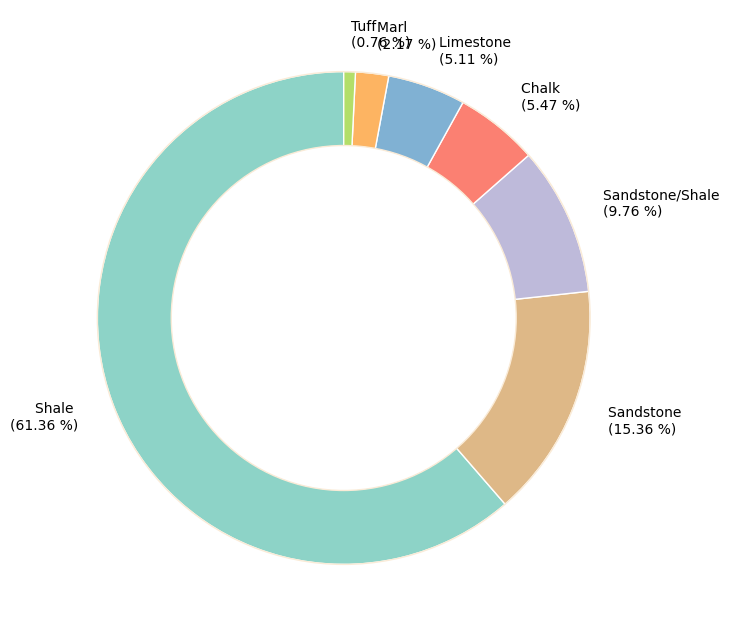

In [150]:
#Set up the plot labels
plot_labels = [f'{i} \n({str(j)} %)' for i,j in zip (lith_data_df.LITH,
                                                     lith_data_df.PERCENTAGE)]

plt.figure(figsize=(8,8))
plt.pie(lith_data_df['PERCENTAGE'],
        labels = plot_labels,
        colors=colours,
        startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        labeldistance=1.15)

#Add inner circle and outer border to the donut chart
#Allow us to have white separations between the segments
centre_circle = plt.Circle((0, 0), 0.70, fc='white', ec='antiquewhite')
outer_circle = plt.Circle((0, 0), 1.00, fc='None', ec='antiquewhite')
fig = plt.gcf()

#Adding the circles to the chart
fig.gca().add_artist(centre_circle)
fig.gca().add_artist(outer_circle)

plt.show()

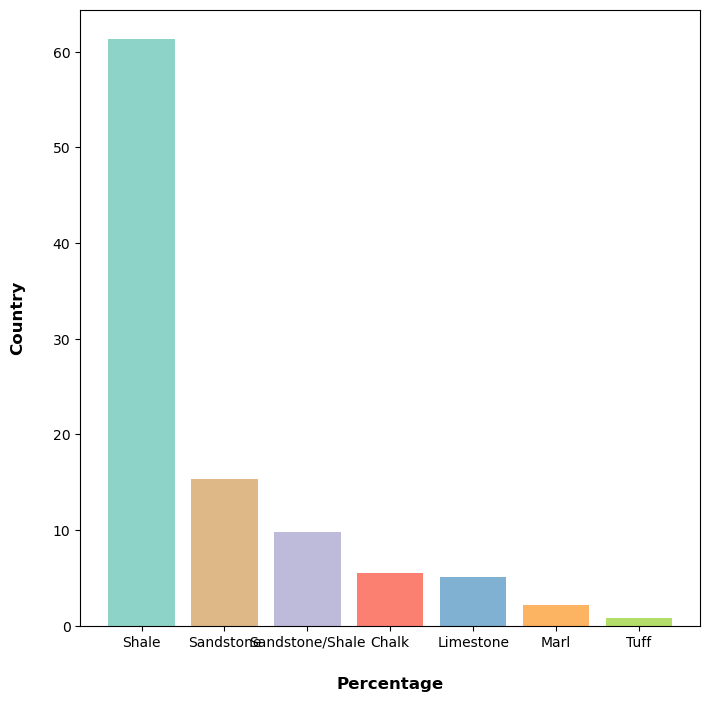

In [144]:
colours = ['#8dd3c7', 'burlywood', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']

plt.figure(figsize=(8, 8))
plt.bar(x=lith_data_df['LITH'], height=lith_data_df['PERCENTAGE'], color=colours)
plt.xlabel('Percentage', fontsize='12', fontweight='bold', labelpad=20)
plt.ylabel('Country', fontsize='12', fontweight='bold', labelpad=20)
plt.show()

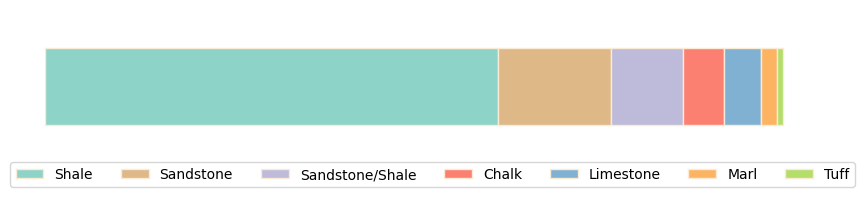

In [149]:
lith_data_df[['PERCENTAGE']].T.plot.barh(stacked=True, legend=True,
                                         figsize=(10, 2), color=colours, edgecolor='antiquewhite')

plt.axis('off')
plt.legend(lith_data_df['LITH'].unique(), loc='lower center', ncol=7,
           bbox_to_anchor=(0.5, -0.2), frameon=True)
plt.show()

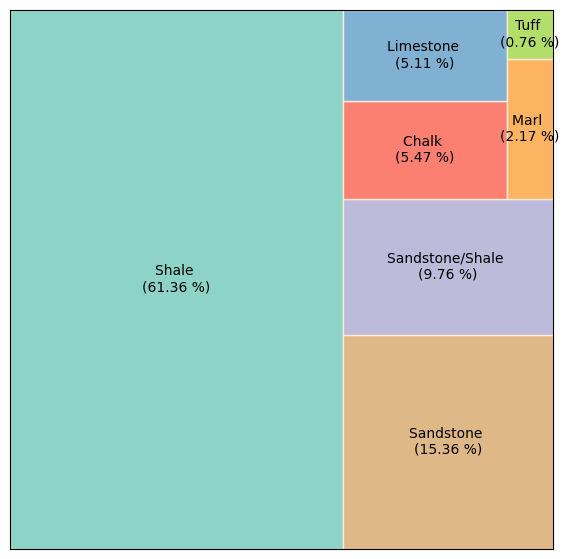

In [158]:
#TREEMAP

import squarify

#Set up the plot labels
plot_labels = [f'{i} \n({str(j)} %)' for i,j in zip(lith_data_df.LITH,
                                                    lith_data_df.PERCENTAGE)]

plt.figure(figsize=(7,7))

squarify.plot(sizes=lith_data_df['PERCENTAGE'],
              label=plot_labels, color=colours, edgecolor='antiquewhite')

#Remove all ticks and lavbels from x & y axis but keep border on
plt.tick_params(axis='both', which='both', bottom=False, left=False,
                labelbottom=False, labelleft=False)

plt.show()

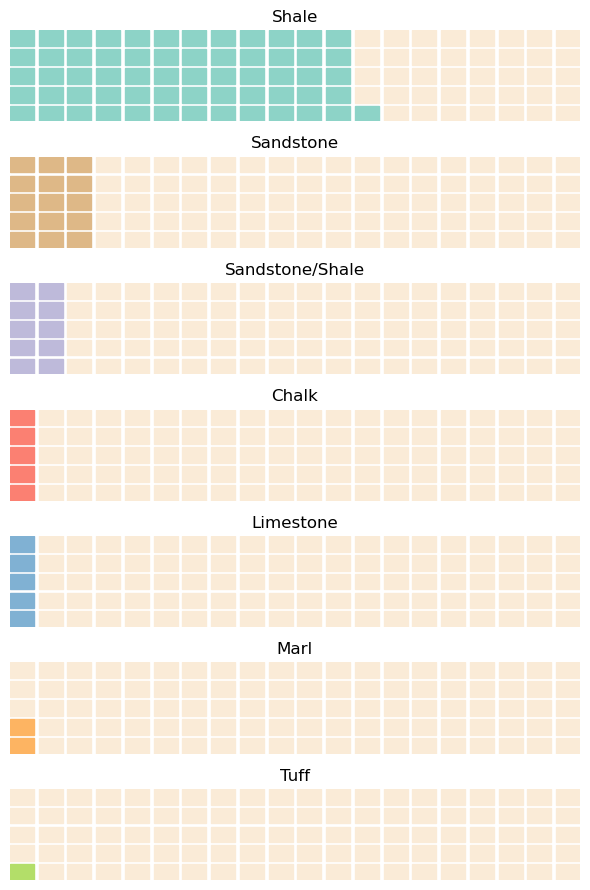

In [145]:
colours = ['#8dd3c7', 'burlywood', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']
off_colour = 'antiquewhite'

#Figsize numbers must be equal or the height greater than the width
#otherwise the plot will appear distort

fig, axs = plt.subplots(len(lith_data_df), 1, figsize=(6, 9))

for (i, ax), color in zip(enumerate(axs.flatten()), colours):
    plot_colours = [color, off_colour]
    perc = lith_data_df.iloc[i]['PERCENTAGE']
    values = [perc, (100-perc)]
    lith = lith_data_df.iloc[i]['LITH']
    Waffle.make_waffle(ax=ax, rows=5, columns=20, values=values, colors = plot_colours)
    ax.set_title(lith)
    
plt.tight_layout()
plt.show()

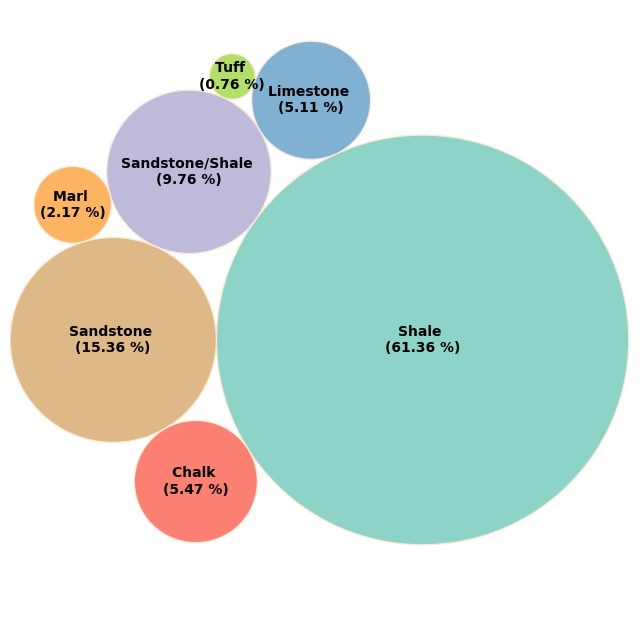

In [159]:
import circlify
import pandas as pd
import matplotlib.pyplot as plt

lith_data_df = pd.DataFrame({'LITH': {0: 'Shale',
                                      1: 'Sandstone',
                                      2: 'Sandstone/Shale',
                                      3: 'Chalk',
                                      4: 'Limestone',
                                      5: 'Marl',
                                      6: 'Tuff'},
                            'PERCENTAGE': {0: 61.36,
                                           1: 15.36,
                                           2: 9.76,
                                           3: 5.47,
                                           4: 5.11,
                                           5: 2.17,
                                           6: 0.76}})

colours = ['#8dd3c7', 'burlywood', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']

plot_labels = [f'{i} \n({str(j)} %)' for i,j in zip(lith_data_df.LITH, lith_data_df.PERCENTAGE)]

circle_plot = circlify.circlify(lith_data_df['PERCENTAGE'].tolist(),
                                target_enclosure = circlify.Circle(x=0, y=0))

#Note that circle_plot starts from the smallest to the largest,
#so we have to reverse the list
circle_plot.reverse()

fig, axs = plt.subplots(figsize=(8, 8))

#Find axis boundaries
lim = max(max(abs(circle.x) + circle.r,
              abs(circle.y) + circle.r,)
          for circle in circle_plot)

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

#Display circles
for circle, colour, label in zip(circle_plot, colours, plot_labels):
    x, y, r = circle
    axs.add_patch(plt.Circle((x,y), r, linewidth=1, facecolor=colour, edgecolor='antiquewhite'))
    plt.annotate(label, (x, y), va='center', ha='center', fontweight='bold')
    
plt.axis('off')
plt.show()

In [83]:
circle_plot.reverse()

In [84]:
circle_plot

[Circle(x=-0.2822149475061374, y=0.7811024874410692, r=0.07375799497054518, level=1, ex={'datum': 0.76}),
 Circle(x=-0.7951044099416682, y=0.36616499282056, r=0.12463274868431969, level=1, ex={'datum': 2.17}),
 Circle(x=-0.028606430373086376, y=0.7041960646742783, r=0.1912549817404252, level=1, ex={'datum': 5.11}),
 Circle(x=-0.3989455608376908, y=-0.5289784119056935, r=0.1978772970633372, level=1, ex={'datum': 5.47}),
 Circle(x=-0.4210733188593548, y=0.47285919588289316, r=0.2643182894468724, level=1, ex={'datum': 9.76}),
 Circle(x=-0.6646310810915063, y=-0.07100026328982925, r=0.33158731958460747, level=1, ex={'datum': 15.36}),
 Circle(x=0.32969898270333836, y=-0.07100026328982925, r=0.6627427442102372, level=1, ex={'datum': 61.36})]

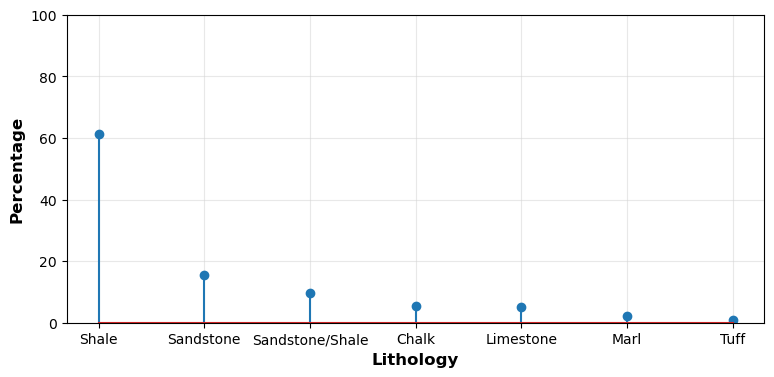

In [161]:
plt.figure(figsize=(9,4))
plt.stem(lith_data_df['PERCENTAGE'])

plt.grid(color='lightgrey', alpha=0.5)
plt.xticks(ticks=range(0, len(lith_data_df)), labels=lith_data_df['LITH'])
plt.xlabel('Lithology', fontsize=12, fontweight='bold')

plt.ylim(0, 100)
plt.ylabel('Percentage', fontsize=12, fontweight='bold')

plt.show()

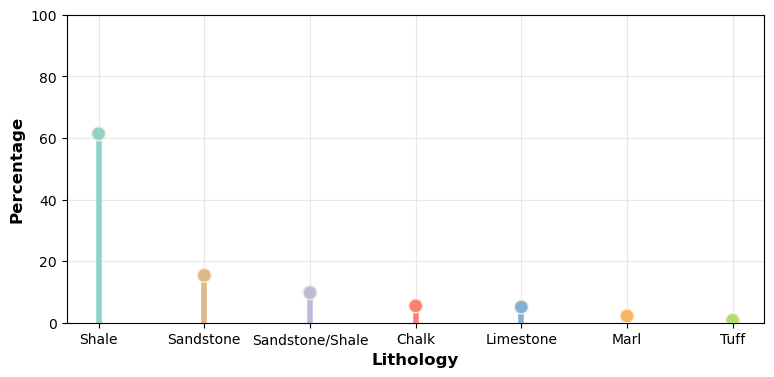

In [164]:
plt.figure(figsize=(9, 4))
plt.scatter(lith_data_df['LITH'], lith_data_df['PERCENTAGE'],
            c=colours, s=100, edgecolors='antiquewhite', zorder=3)

plt.vlines(lith_data_df['LITH'], ymin=0, ymax=lith_data_df['PERCENTAGE'],
           colors=colours, linewidth=4, zorder=2)

plt.ylim(0, 100)
plt.ylabel('Percentage', fontsize=12, fontweight='bold')
plt.xlabel('Lithology', fontsize=12, fontweight='bold')
plt.grid(color='lightgrey', alpha=0.5, zorder=1)

plt.show()

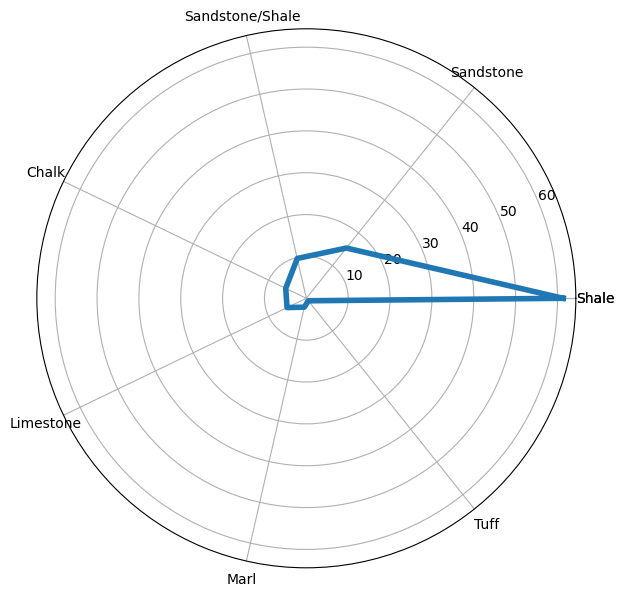

In [165]:
import numpy as np

lith_data_df = pd.DataFrame({'LITH': {0: 'Shale',
                                      1: 'Sandstone',
                                      2: 'Sandstone/Shale',
                                      3: 'Chalk',
                                      4: 'Limestone',
                                      5: 'Marl',
                                      6: 'Tuff'},
                             'PERCENTAGE': {0: 61.36,
                                            1: 15.36,
                                            2: 9.76,
                                            3: 5.47,
                                            4: 5.11,
                                            5: 2.17,
                                            6: 0.76}})

lithologies = list(lith_data_df['LITH'])
percentages = list(lith_data_df['PERCENTAGE'])

lithologies = [*lithologies, lithologies[0]]
percentages = [*percentages, percentages[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(lithologies))

plt.figure(figsize=(7,7))
plt.subplot(polar=True)
plt.plot(label_loc, percentages, lw=4)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=lithologies)

plt.plot()
plt.show()

In [88]:
import plotly.express as px
fig = px.line_polar(lith_data_df, r='PERCENTAGE', theta='LITH', line_close=True, width=800, height=800)

fig.update_traces(fill='toself', line = dict(color='red'))
fig.show()

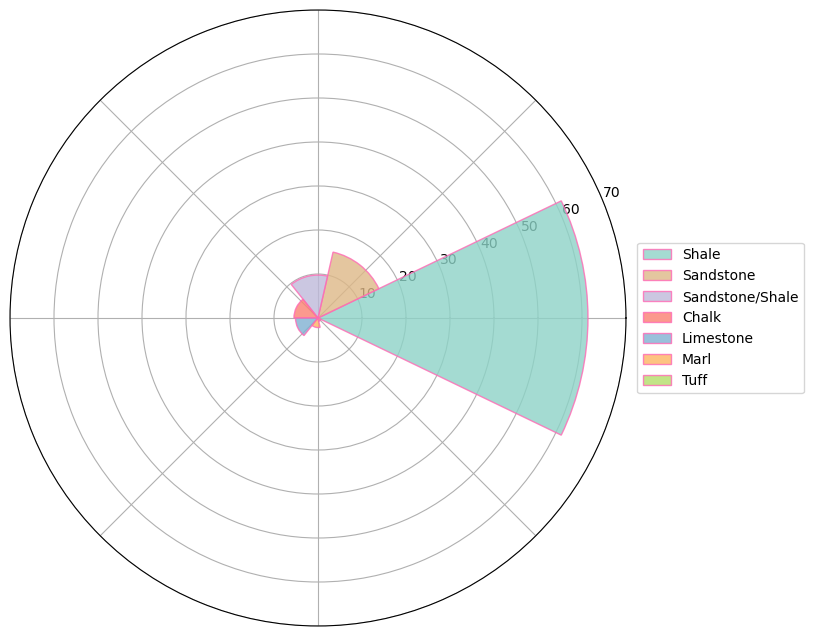

In [177]:
#RADIAL BAR CHART
lith_data_df = pd.DataFrame({'LITH': {0: 'Shale',
                                      1: 'Sandstone',
                                      2: 'Sandstone/Shale',
                                      3: 'Chalk',
                                      4: 'Limestone',
                                      5: 'Marl',
                                      6: 'Tuff'},
                             'PERCENTAGE': {0: 61.36,
                                            1: 15.36,
                                            2: 9.76,
                                            3: 5.47,
                                            4: 5.11,
                                            5: 2.17,
                                            6: 0.76}})

colours = ['#8dd3c7', 'burlywood', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']

labels = lith_data_df['LITH'].unique()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8,8))

angles = np.linspace(0, 2*np.pi, len(lith_data_df), endpoint=False)

upper_limit = 100
lower_limit = 0

max_value = lith_data_df['PERCENTAGE'].max()

indexes = list(range(0, len(lith_data_df)))
width = 2*np.pi / len(lith_data_df)
angles = [element * width for element in indexes]

#Create the bars
bars = ax.bar(x = angles, height=lith_data_df['PERCENTAGE'], width=width,
              color=colours, edgecolor='hotpink', zorder=2, alpha=0.8)

plt.grid(zorder=0)

#Remove all ticks and labels from x & y axis but keep border on
plt.tick_params(axis='x', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)

#Control the scale of the circle
plt.ylim(0, 70)

ax.legend(bars, labels, loc=7, bbox_to_anchor=(1.3, 0.5)) #loc=7 is location code for 'center right'

plt.show()

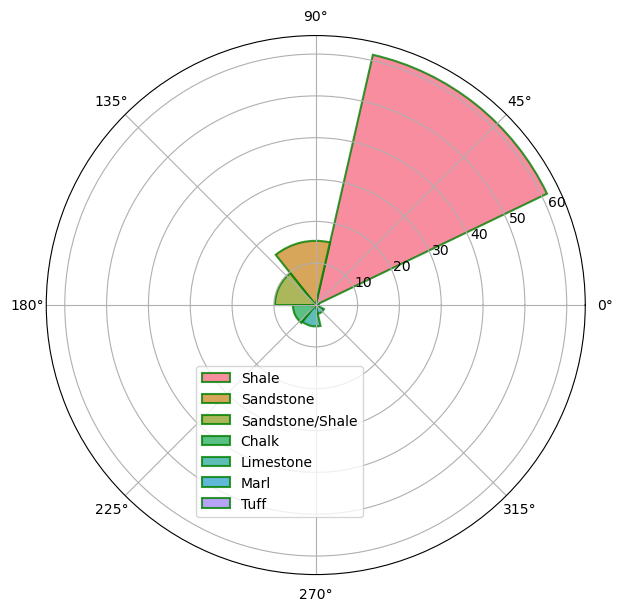

In [180]:
plt.figure(figsize=(7, 7))

ax = plt.subplot(111, polar=True)
#plt.axis('off)

import seaborn as sns
sequential_colors = sns.color_palette('husl', 8)

#Set the coordinates limits
upperLimit = 100
lowerLimit = 0

#Compute max and min in the dataset
max_value = lith_data_df['PERCENTAGE'].max()

#Let's compute heights: they are a conversion of each item value in those new coordinates
#In our example, 0 i nthe dataset will be converted to the lowerLimit (10)
#The maximum will be converted to the upperlimit (100)
slope = (max_value - lowerLimit) / max_value
heights = lith_data_df['PERCENTAGE']

bar_width = 2 * np.pi / len(lith_data_df)

indexes = list(range(1, len(lith_data_df.index)+1))
angles = [element * bar_width for element in indexes]
bars = ax.bar(x=angles, height=heights, width=bar_width, color=sequential_colors, bottom=lowerLimit, linewidth=1.5, edgecolor='green', alpha=0.8)
ax.legend(bars, labels, loc='best', bbox_to_anchor=(0.6, 0.4)) 

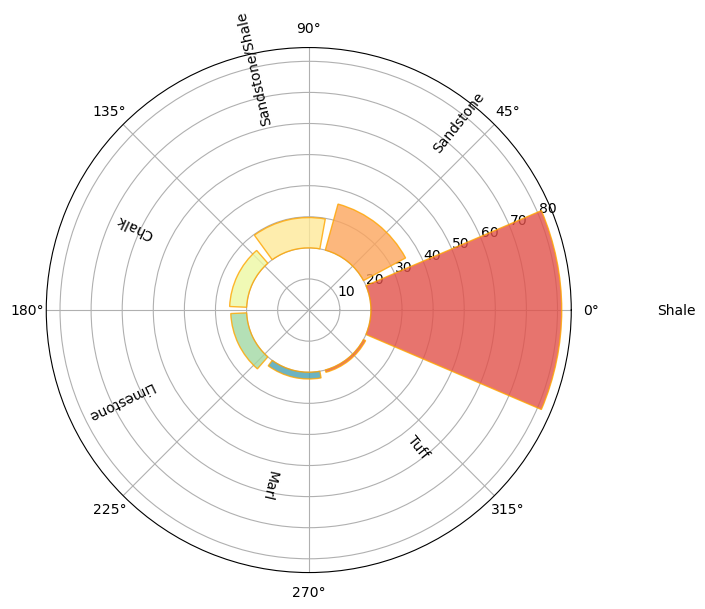

In [179]:
iN = len(lith_data_df)
arrCnts = np.array(lith_data_df['PERCENTAGE'])
lObjectsALLlbls = lith_data_df['LITH'].unique()

theta = np.arange(0,2*np.pi, 2*np.pi/iN)
width = (2*np.pi)/iN * 0.9

sequential_colors = sns.color_palette('Spectral')

fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
bars = ax.bar(theta, arrCnts, width=width, bottom=20, color=sequential_colors, edgecolor='orange', zorder=2, alpha=0.8)
#ax.set_xticks('off')
#plt.legend()

bottom = 50
rotations = np.rad2deg(theta)
y0, y1 = ax.get_ylim()

for x, bar, rotation, label in zip(theta, bars, rotations, lObjectsALLlbls):
    offset = (bottom+bar.get_height())/(y1-y0)
    h = offset + len(label)/2.*0.032
    lab = ax.text(x, h, label, transform=ax.get_xaxis_transform(), ha='center', va='center')
    lab.set_rotation(rotation)
    
plt.show()

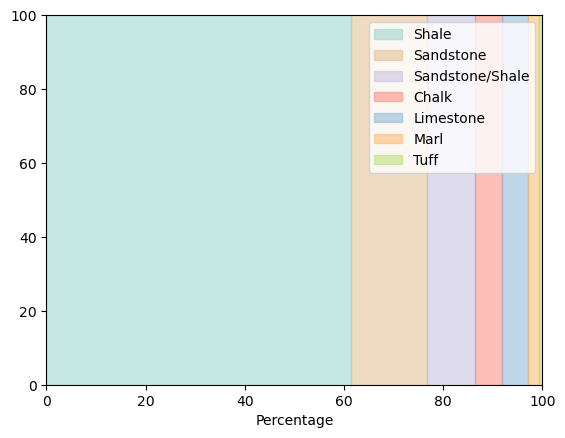

In [92]:
import matplotlib.pyplot as plt
import numpy as np

lith_data_df = pd.DataFrame({'LITH': {0: 'Shale',
                                      1: 'Sandstone',
                                      2: 'Sandstone/Shale',
                                      3: 'Chalk',
                                      4: 'Limestone',
                                      5: 'Marl',
                                      6: 'Tuff'},
                             'PERCENTAGE': {0: 61.36,
                                            1: 15.36,
                                            2: 9.76,
                                            3: 5.47,
                                            4: 5.11,
                                            5: 2.17,
                                            6: 0.76}})

colours = ['#8dd3c7', 'burlywood', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']

fig, ax = plt.subplots()

#Get the data as numpy arrays
liths = lith_data_df['LITH'].values
percents = lith_data_df['PERCENTAGE'].values

#Normalize th percents so that the sum is 100
percents = percents / percents.sum() * 100

#Create the cumulative sum of the percents
cumulative = np.cumsum(percents)
cumulative = np.insert(cumulative, 0, 0)

#Plot the pyramid chart
for i in range (len(liths)):
    ax.fill_betweenx(y=[0, 100],
                    x1 = cumulative[i],
                    x2 = cumulative[i+1],
                    color = colours [i],
                    alpha = 0.5)
    
#Set the limits and labels
ax.set_ylim (0, 100)
ax.set_xlim (0, 100)
ax.set_xlabel ('Percentage')

#Add a legend
ax.legend(liths, loc='upper right')

#Show the plot
plt.show()
                    

In [93]:
#Get the data as numpy arrays
liths = lith_data_df['LITH'].values
percents = lith_data_df['PERCENTAGE'].values

#Normalize the percents so that the sum is 100
percents = percents / percents.sum() * 100

#Create the cumulative sum of the percents
cumulative = np.cumsum(percents)
cumulative = np.insert(cumulative, 0, 0)

#Plot the pyramid chart
for i in range(len(liths)):
    ax.fill_betweenx(y=[0, 100],
                      x1 = cumulative[i],
                      x2 = cumulative[i+1],
                      color = colours [i],
                      alpha = 0.5)
    
#Set the limits and labels
ax.set_ylim (0, 100)
ax.set_xlim (0, 100)
ax.set_xlabel ('Percentage')

#Add a legend
ax.legend(liths, loc='upper right')

#Invert the axis
ax.invert_yaxis()
#Show the plot
plt.show()

(0.0, 70.0)

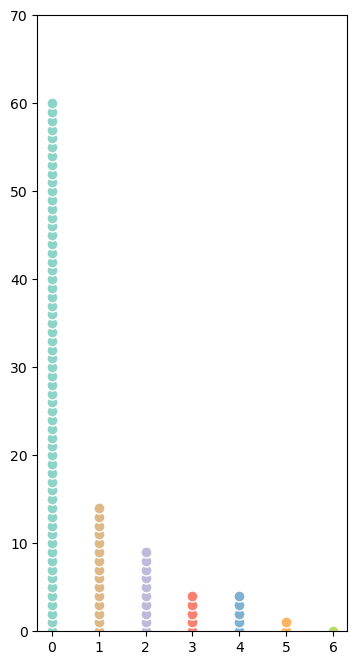

In [181]:
# DOT PLOT
import matplotlib.pyplot as plt
import numpy as np

lith_data_df = pd.DataFrame({'LITH': {0: 'Shale',
  1: 'Sandstone',
  2: 'Sandstone/Shale',
  3: 'Chalk',
  4: 'Limestone',
  5: 'Marl',
  6: 'Tuff'},
 'PERCENTAGE': {0: 61.36,
  1: 15.36,
  2: 9.76,
  3: 5.47,
  4: 5.11,
  5: 2.17,
  6: 0.76}})

colours = ['#8dd3c7', 'burlywood', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']

labels = lith_data_df['LITH'].unique()
percentage_values = round(lith_data_df['PERCENTAGE'], 0)

percentage_values = [int(x) for x in percentage_values]

fig, ax = plt.subplots(figsize=(4, 8))

for i, (lith, percentage, colour) in enumerate(zip(labels, percentage_values, colours)):
    ax.plot([i]*percentage, list(range(percentage)), marker='o', color='white',
            markerfacecolor=colour, markersize='8', linestyle='')
    
plt.ylim(0, 70)